# An Analysis of the Cybercrime landscape in an AI World📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

### How is AI Reshaping CyberCrime?

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

### Since AI has become more readily available for the masses, has there been a distinct rise in cybercrime? Whether frequency or sophistication?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

### There has been a distinct rise in cybercrime sophistication. But it is a two sided coin, AI is used by threatactors but it is also being used by cybersecurity software and agents.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

### Global Cybersecurity Threats (2015-2024) https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024
### Known Exploited Vulneratiblities Catalog https://www.cisa.gov/known-exploited-vulnerabilities-catalog
### Global Dataset of Cyber Incidents https://zenodo.org/records/14965395
### NIST National Vulnerabiltiy Database https://nvd.nist.gov/vuln/data-feeds 

### I'm going to use the datasets to see what trends or interesting statistics can be gleamed to prove or disprove my theory that AI has contributed greatly to the increase in cybercrime.

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

### This analysis will employ a methodology to examine the relationship between AI availability and the increase in cybercrime. By leveraging multiple datasets spanning the period from 2017-2025, I will conduct trend analysis, correlation studies, and statistical evaluation to test the hypothesis that AI technologies have significantly contributed to the increase in cybercrime sophistication and incidents.

In [ ]:
# Load necessary libraries
import pandas as pd

# Load datasets
eurepoc_attribution_data = pd.read_csv('./data/eurepoc_attribution_dataset_1.3.csv')
global_security_threats = pd.read_csv('./data/Global_Cybersecurity_Threats_2015_2024.csv')
known_exploited_vulnerabilities = pd.read_csv('./data/known_exploited_vulnerabilities.csv')



In [ ]:
# Display basic statistics of the datasets
display(eurepoc_attribution_data.describe())
display(global_security_threats.describe())
display(known_exploited_vulnerabilities.describe())

In [17]:
# Display information about the datasets
display(eurepoc_attribution_data.info())
display(global_security_threats.info())
display(known_exploited_vulnerabilities.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   attribution_id         5217 non-null   int64  
 1   incident_id            5217 non-null   int64  
 2   attribution_year       3594 non-null   float64
 3   attribution_month      2652 non-null   float64
 4   attribution_day        2652 non-null   float64
 5   attribution_date       5217 non-null   object 
 6   attribution_basis      5217 non-null   object 
 7   attribution_type       5217 non-null   object 
 8   attribution_subtype    5217 non-null   object 
 9   attributing_country    5217 non-null   object 
 10  attributing_actor      5217 non-null   object 
 11  attributing_company    5217 non-null   object 
 12  settled_attribution    5054 non-null   object 
 13  initiator_name         5217 non-null   object 
 14  initiator_alpha_2      5217 non-null   object 
 15  init

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   cveID                       1449 non-null   object
 1   vendorProject               1449 non-null   object
 2   product                     1449 non-null   object
 3   vulnerabilityName           1449 non-null   object
 4   dateAdded                   1449 non-null   object
 5   shortDescription            1449 non-null   object
 6   requiredAction              1449 non-null   object
 7   dueDate                     1449 non-null   object
 8   knownRansomwareCampaignUse  1449 non-null   object
 9   notes                       1449 non-null   object
 10  cwes                        1287 non-null   object
dtypes: object(11)
memory usage: 124.7+ KB


None

In [14]:
# Display first few rows of the datasets
display(eurepoc_attribution_data.head())
display(global_security_threats.head())
display(known_exploited_vulnerabilities.head())

,attribution_id,incident_id,attribution_year,attribution_month,attribution_day,attribution_date,attribution_basis,attribution_type,attribution_subtype,attributing_country,attributing_actor,attributing_company,settled_attribution,initiator_name,initiator_alpha_2,initiator_country,initiator_category,initiator_subcategory
0,6,6,NaN,NaN,NaN,Not available,Attacker confirms,Self-attribution in the course of the attack (...,Not available,Not available,Not available,Not available,True,Unknown,US,United States,Non-state-group,Hacktivist(s)
1,7,7,NaN,NaN,NaN,Not available,Attacker confirms,Self-attribution in the course of the attack (...,Not available,Not available,Not available,Not available,True,Antijapan,KR,"Korea, Republic of",Non-state-group,Hacktivist(s)
2,10,10,2013.0,NaN,NaN,2013,Attribution by third-party,"Direct statement in media report (e.g., Reuter...",Not available,Not available,Not available,Not available,True,NSA/Equation Group,US,United States,State,Not available
3,11,11,2005.0,NaN,NaN,2005,Attribution by receiver government / state entity,"Anonymous statement in media report (e.g., Reu...",Not available,Not available,Not available,Not available,True,Unknown,CN,China,State affiliated actor,Not available
4,12,11,2005.0,NaN,NaN,2005,IT-security community attributes attacker,"Technical report (e.g., by IT-companies, Citiz...",Not available,Not available,Not available,Not available,NaN,Unknown,CN,China,State affiliated actor,Not available


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


,cveID,vendorProject,product,vulnerabilityName,dateAdded,shortDescription,requiredAction,dueDate,knownRansomwareCampaignUse,notes,cwes
0,CVE-2025-54236,Adobe,Commerce and Magento,Adobe Commerce and Magento Improper Input Vali...,2025-10-24,Adobe Commerce and Magento Open Source contain...,"Apply mitigations per vendor instructions, fol...",2025-11-14,Unknown,https://experienceleague.adobe.com/en/docs/exp...,CWE-20
1,CVE-2025-59287,Microsoft,Windows,Microsoft Windows Server Update Service (WSUS)...,2025-10-24,Microsoft Windows Server Update Service (WSUS)...,"Apply mitigations per vendor instructions, fol...",2025-11-14,Unknown,https://msrc.microsoft.com/update-guide/en-US/...,CWE-502
2,CVE-2025-61932,Motex,LANSCOPE Endpoint Manager,Motex LANSCOPE Endpoint Manager Improper Verif...,2025-10-22,Motex LANSCOPE Endpoint Manager contains an im...,"Apply mitigations per vendor instructions, fol...",2025-11-12,Unknown,https://www.motex.co.jp/news/notice/2025/relea...,CWE-940
3,CVE-2022-48503,Apple,Multiple Products,Apple Multiple Products Unspecified Vulnerability,2025-10-20,"Apple macOS, iOS, tvOS, Safari, and watchOS co...","Apply mitigations per vendor instructions, fol...",2025-11-10,Unknown,https://support.apple.com/en-us/HT213340 ; htt...,NaN
4,CVE-2025-2746,Kentico,Xperience CMS,Kentico Xperience CMS Authentication Bypass Us...,2025-10-20,Kentico Xperience CMS contains an authenticati...,"Apply mitigations per vendor instructions, fol...",2025-11-10,Unknown,https://devnet.kentico.com/download/hotfixes ;...,CWE-288


In [16]:
# Display null value counts for each dataset
display(eurepoc_attribution_data.isnull().sum())
display(global_security_threats.isnull().sum())
display(known_exploited_vulnerabilities.isnull().sum())

attribution_id              0
incident_id                 0
attribution_year         1623
attribution_month        2565
attribution_day          2565
attribution_date            0
attribution_basis           0
attribution_type            0
attribution_subtype         0
attributing_country         0
attributing_actor           0
attributing_company         0
settled_attribution       163
initiator_name              0
initiator_alpha_2           0
initiator_country           0
initiator_category          0
initiator_subcategory      18
dtype: int64

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

cveID                           0
vendorProject                   0
product                         0
vulnerabilityName               0
dateAdded                       0
shortDescription                0
requiredAction                  0
dueDate                         0
knownRansomwareCampaignUse      0
notes                           0
cwes                          162
dtype: int64

In [23]:
# Europoc attribution data specific null analysis
display(f'Original dataset size: {len(eurepoc_attribution_data)}')
display(f'Rows with null attribution_year: {eurepoc_attribution_data["attribution_year"].isnull().sum()}')

# Remove rows where attribution_year is null
eurepoc_attribution_data = eurepoc_attribution_data[eurepoc_attribution_data['attribution_year'].notna()]
display(f'Dataset size after removing null years: {len(eurepoc_attribution_data)}')

# Verify no null values remain in attribution_year
display(known_exploited_vulnerabilities.isnull().sum())

# Preview of the cleaned data
display(eurepoc_attribution_data.head())

'Original dataset size: 3594'

'Rows with null attribution_year: 0'

'Dataset size after removing null years: 3594'

cveID                           0
vendorProject                   0
product                         0
vulnerabilityName               0
dateAdded                       0
shortDescription                0
requiredAction                  0
dueDate                         0
knownRansomwareCampaignUse      0
notes                           0
cwes                          162
dtype: int64

,attribution_id,incident_id,attribution_year,attribution_month,attribution_day,attribution_date,attribution_basis,attribution_type,attribution_subtype,attributing_country,attributing_actor,attributing_company,settled_attribution,initiator_name,initiator_alpha_2,initiator_country,initiator_category,initiator_subcategory
2,10,10,2013.0,NaN,NaN,2013,Attribution by third-party,"Direct statement in media report (e.g., Reuter...",Not available,Not available,Not available,Not available,True,NSA/Equation Group,US,United States,State,Not available
3,11,11,2005.0,NaN,NaN,2005,Attribution by receiver government / state entity,"Anonymous statement in media report (e.g., Reu...",Not available,Not available,Not available,Not available,True,Unknown,CN,China,State affiliated actor,Not available
4,12,11,2005.0,NaN,NaN,2005,IT-security community attributes attacker,"Technical report (e.g., by IT-companies, Citiz...",Not available,Not available,Not available,Not available,NaN,Unknown,CN,China,State affiliated actor,Not available
5,15,13,2009.0,NaN,NaN,2009,Attribution by third-party,"Attribution given, type unclear",Not available,Not available,Not available,Not available,True,Unknown,KP,"Korea, Democratic People's Republic of",State,Not available
6,18,15,2004.0,NaN,NaN,2004,Attribution by third-party,"Attribution given, type unclear",Not available,Not available,Not available,Not available,True,Unknown,CN,China,State affiliated actor,Not available


,Year,Number of Attacks
0,2015,277
1,2016,285
2,2017,319
3,2018,310
4,2019,263
5,2020,315
6,2021,299
7,2022,318
8,2023,315
9,2024,299


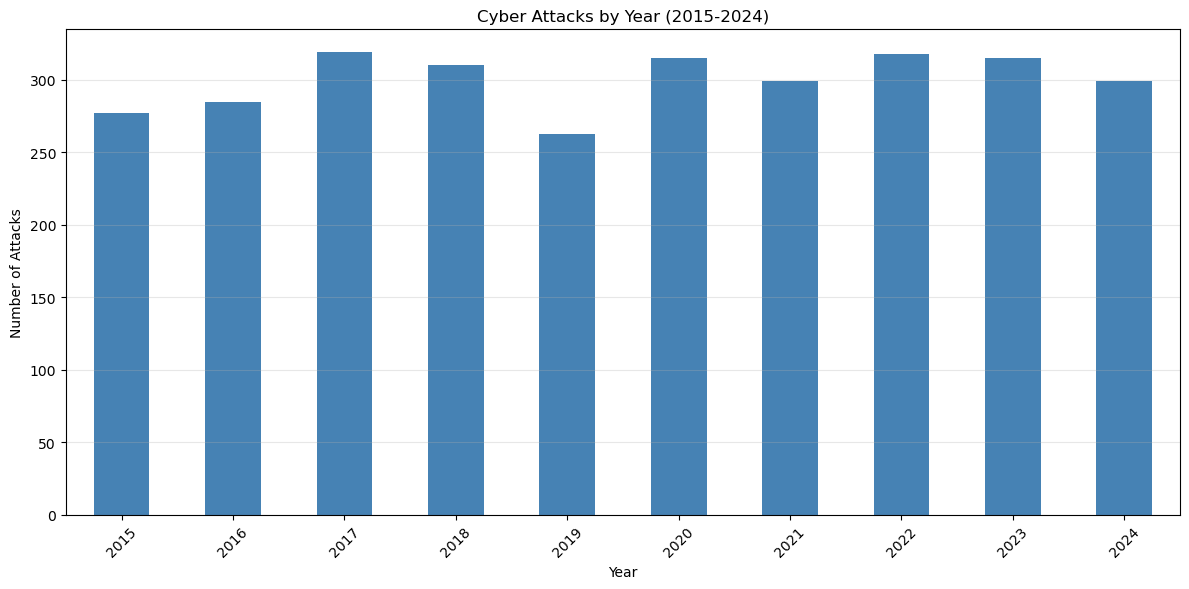

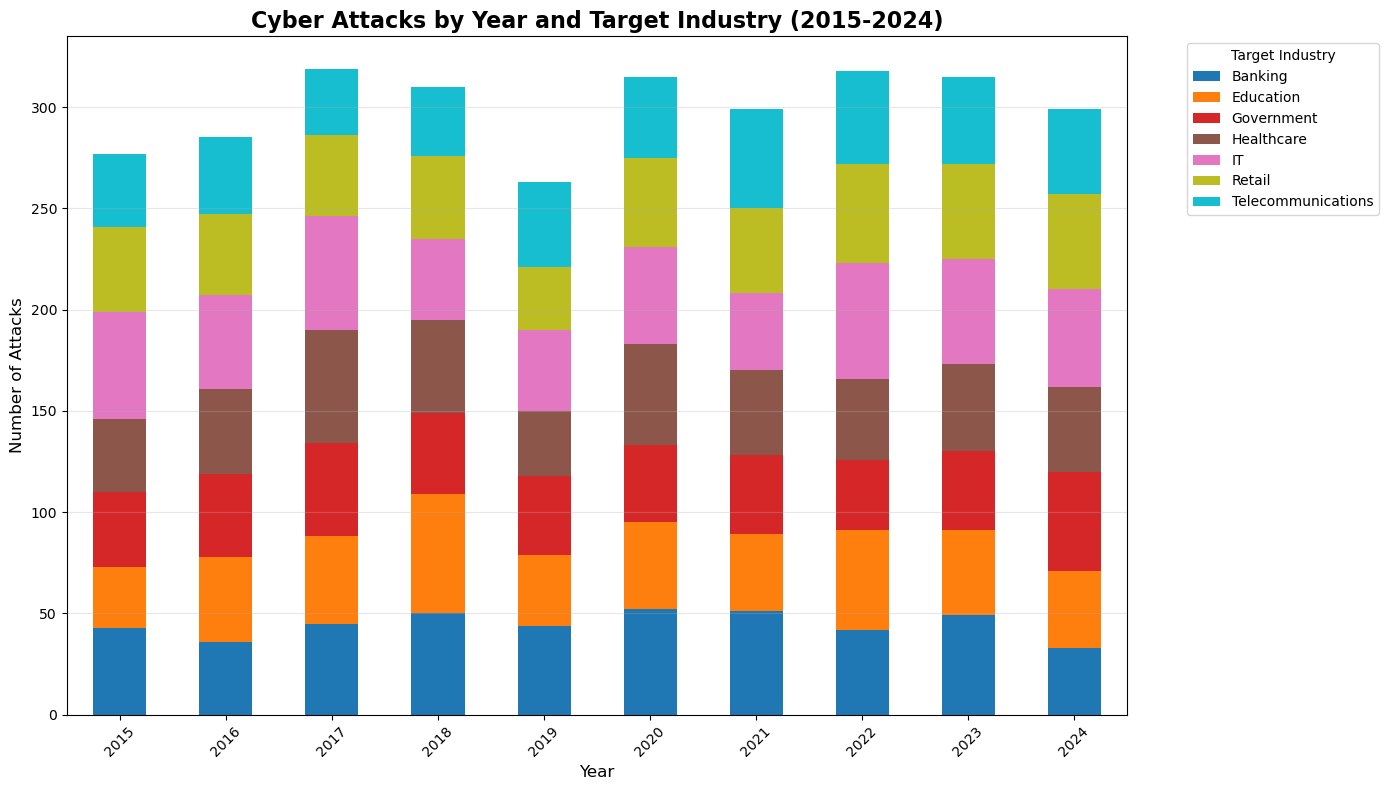

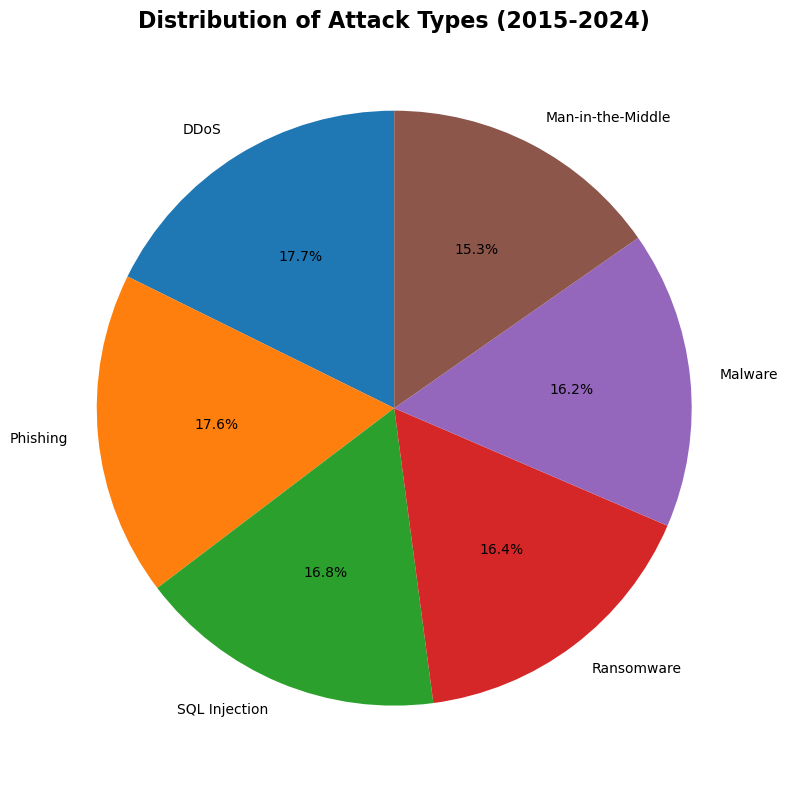

In [ ]:
# Global security threats data specific analysis
# import matplotlib
import matplotlib.pyplot as plt

# Variables for analysis
attacks_by_year = global_security_threats['Year'].value_counts().sort_index()
industry_year = pd.crosstab(global_security_threats['Year'], global_security_threats['Target Industry'])
attack_counts = global_security_threats['Attack Type'].value_counts()

# Count of cyber attacks by year
attacks_by_year_df = attacks_by_year.reset_index()
attacks_by_year_df.columns = ['Year', 'Number of Attacks']
display(attacks_by_year_df)

# Bar plot of cyber attacks by year
plt.figure(figsize=(12, 6))
attacks_by_year.plot(kind='bar', color='steelblue')
plt.title('Cyber Attacks by Year (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Bar plot of cyber attacks by year and target industry
fig, ax = plt.subplots(figsize=(14, 8))
industry_year.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')
plt.title('Cyber Attacks by Year and Target Industry (2015-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.legend(title='Target Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Pie chart of attack type distribution
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(attack_counts.values, labels=attack_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Attack Types (2015-2024)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

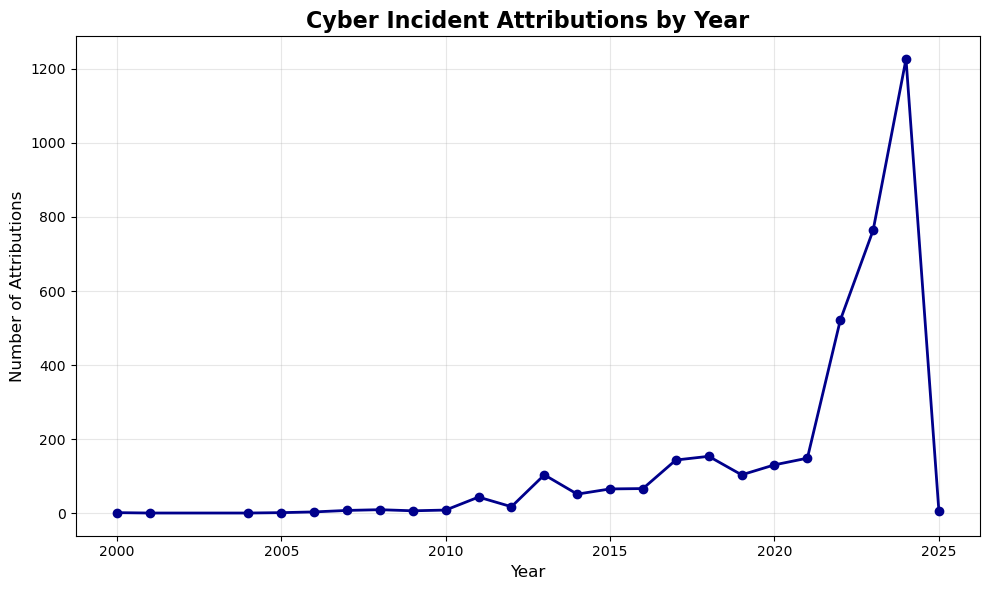

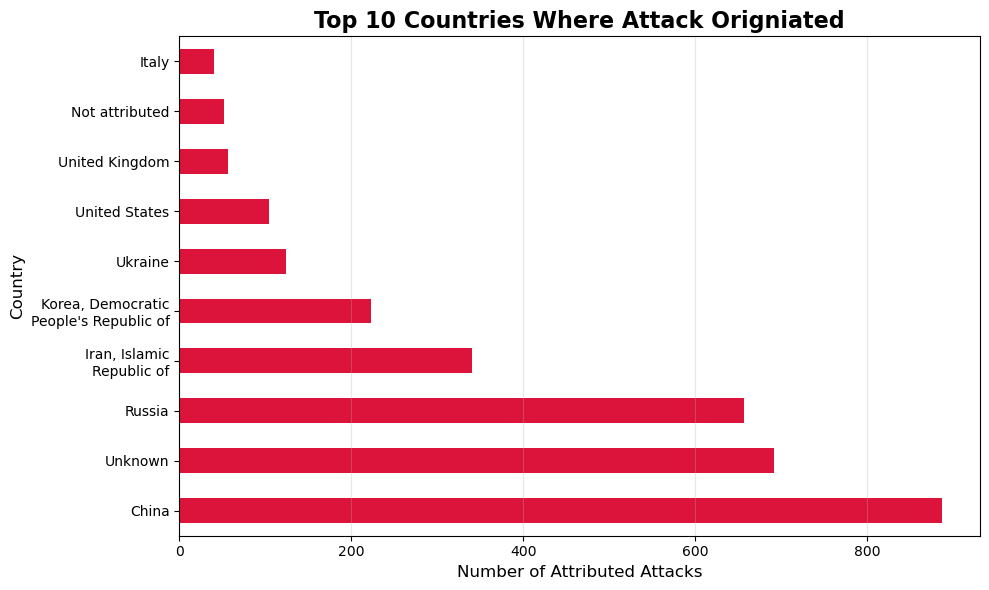

In [43]:
# Europoc attribution data analysis

# Variables for analysis
attacks_by_year = eurepoc_attribution_data['attribution_year'].value_counts().sort_index()
top_origin = eurepoc_attribution_data['initiator_country'].value_counts().head(10)

# Attribution Trends Over Time
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(attacks_by_year.index, attacks_by_year.values, marker='o', linewidth=2, color='darkblue')
plt.title('Cyber Incident Attributions by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attributions', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
# Some names are too long, so we wrap them for better display
import textwrap
top_origin.index = ['\n'.join(textwrap.wrap(str(name), width=20)) for name in top_origin.index]

top_origin.plot(kind='barh', ax=ax, color='crimson')
plt.title('Top 10 Countries Where Attack Origniated', fontsize=16, fontweight='bold')
plt.xlabel('Number of Attributed Attacks', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()



In [44]:
import json
from pathlib import Path

data_dir = Path('./data/nist')  # Adjust path to where your files are located

def load_nvd_2_0_data(json_file):
    """Load NVD JSON 2.0 format file and extract relevant CVE data"""
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    cve_list = []
    
    for item in data['vulnerabilities']:
        cve_data = item['cve']
        cve_id = cve_data['id']
        
        # Extract CVSS scores (v3.1, v3.0, or v2.0)
        cvss_v31 = None
        cvss_v30 = None
        cvss_v2 = None
        
        if 'metrics' in cve_data:
            metrics = cve_data['metrics']
            
            if 'cvssMetricV31' in metrics:
                cvss_v31 = metrics['cvssMetricV31'][0]['cvssData']['baseScore']
            
            if 'cvssMetricV30' in metrics:
                cvss_v30 = metrics['cvssMetricV30'][0]['cvssData']['baseScore']
            
            if 'cvssMetricV2' in metrics:
                cvss_v2 = metrics['cvssMetricV2'][0]['cvssData']['baseScore']
        
        # Extract description
        description = ''
        if 'descriptions' in cve_data:
            for desc in cve_data['descriptions']:
                if desc['lang'] == 'en':
                    description = desc['value']
                    break
        
        cve_list.append({
            'cveID': cve_id,
            'cvss_v31_score': cvss_v31,
            'cvss_v30_score': cvss_v30,
            'cvss_v2_score': cvss_v2,
            'description': description
        })
    
    return pd.DataFrame(cve_list)

# Load all NVD 2.0 files (2015-2025)
years = range(2015, 2026)
all_nvd_data = []

for year in years:
    file_path = data_dir / f'nvdcve-2.0-{year}.json'
    
    if file_path.exists():
        display(f'Loading {file_path.name}...')
        df = load_nvd_2_0_data(file_path)
        all_nvd_data.append(df)
        display(f'  ✓ Loaded {len(df)} CVEs from {year}')
    else:
        display(f'  ✗ File not found: {file_path.name}')

# Combine all years
nvd_full = pd.concat(all_nvd_data, ignore_index=True)

display(f'\nTotal CVEs loaded: {len(nvd_full)}')
display(nvd_full.head(10))

# Save to CSV for future use
nvd_csv_path = data_dir / 'nvd_cve_data_2015_2025.csv'
nvd_full.to_csv(nvd_csv_path, index=False)
display(f'\nSaved to: {nvd_csv_path}')

# Now merge with your KEV data
kev_with_scores = pd.merge(
    known_exploited_vulnerabilities,
    nvd_full[['cveID', 'cvss_v31_score', 'cvss_v30_score', 'cvss_v2_score']],
    on='cveID',
    how='left'
)

# Create a combined CVSS score column (prefer v3.1, then v3.0, then v2.0)
kev_with_scores['cvss_score'] = kev_with_scores['cvss_v31_score'].fillna(
    kev_with_scores['cvss_v30_score']
).fillna(kev_with_scores['cvss_v2_score'])

display('\nKEV data with CVSS scores:')
display(kev_with_scores[['cveID', 'vendorProject', 'product', 'cvss_score']].head(10))

# Show some stats
display(f'\nCVEs with CVSS v3.1 scores: {kev_with_scores["cvss_v31_score"].notna().sum()}')
display(f'CVEs with CVSS v3.0 scores: {kev_with_scores["cvss_v30_score"].notna().sum()}')
display(f'CVEs with CVSS v2 scores: {kev_with_scores["cvss_v2_score"].notna().sum()}')
display(f'CVEs with any CVSS score: {kev_with_scores["cvss_score"].notna().sum()}')

'Loading nvdcve-2.0-2015.json...'

'  ✓ Loaded 8766 CVEs from 2015'

'Loading nvdcve-2.0-2016.json...'

'  ✓ Loaded 10562 CVEs from 2016'

'Loading nvdcve-2.0-2017.json...'

'  ✓ Loaded 17032 CVEs from 2017'

'Loading nvdcve-2.0-2018.json...'

'  ✓ Loaded 17497 CVEs from 2018'

'Loading nvdcve-2.0-2019.json...'

'  ✓ Loaded 17082 CVEs from 2019'

'Loading nvdcve-2.0-2020.json...'

'  ✓ Loaded 20645 CVEs from 2020'

'  ✗ File not found: nvdcve-2.0-2021.json'

'Loading nvdcve-2.0-2022.json...'

'  ✓ Loaded 27074 CVEs from 2022'

'Loading nvdcve-2.0-2023.json...'

'  ✓ Loaded 30455 CVEs from 2023'

'Loading nvdcve-2.0-2024.json...'

'  ✓ Loaded 38699 CVEs from 2024'

'  ✗ File not found: nvdcve-2.0-2025.json'

'\nTotal CVEs loaded: 187812'

,cveID,cvss_v31_score,cvss_v30_score,cvss_v2_score,description
0,CVE-2015-0361,NaN,NaN,7.8,"Use-after-free vulnerability in Xen 4.2.x, 4.3..."
1,CVE-2015-0917,NaN,NaN,4.3,Cross-site scripting (XSS) vulnerability in th...
2,CVE-2015-0918,NaN,NaN,4.3,Cross-site scripting (XSS) vulnerability in th...
3,CVE-2015-0919,NaN,NaN,7.5,Multiple SQL injection vulnerabilities in the ...
4,CVE-2015-0920,NaN,NaN,6.8,Cross-site request forgery (CSRF) vulnerabilit...
5,CVE-2015-0204,NaN,NaN,4.3,The ssl3_get_key_exchange function in s3_clnt....
6,CVE-2015-0205,NaN,NaN,5.0,The ssl3_get_cert_verify function in s3_srvr.c...
7,CVE-2015-0206,NaN,NaN,5.0,Memory leak in the dtls1_buffer_record functio...
8,CVE-2015-0921,NaN,NaN,4.0,XML external entity (XXE) vulnerability in the...
9,CVE-2015-0922,NaN,NaN,5.0,McAfee ePolicy Orchestrator (ePO) before 4.6.9...


'\nSaved to: data/nist/nvd_cve_data_2015_2025.csv'

'\nKEV data with CVSS scores:'

,cveID,vendorProject,product,cvss_score
0,CVE-2025-54236,Adobe,Commerce and Magento,NaN
1,CVE-2025-59287,Microsoft,Windows,NaN
2,CVE-2025-61932,Motex,LANSCOPE Endpoint Manager,NaN
3,CVE-2022-48503,Apple,Multiple Products,8.8
4,CVE-2025-2746,Kentico,Xperience CMS,NaN
5,CVE-2025-2747,Kentico,Xperience CMS,NaN
6,CVE-2025-33073,Microsoft,Windows,NaN
7,CVE-2025-61884,Oracle,E-Business Suite,NaN
8,CVE-2025-54253,Adobe,Experience Manager (AEM) Forms,NaN
9,CVE-2025-47827,IGEL,IGEL OS,NaN


'\nCVEs with CVSS v3.1 scores: 974'

'CVEs with CVSS v3.0 scores: 51'

'CVEs with CVSS v2 scores: 602'

'CVEs with any CVSS score: 976'

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

In [3]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbconvert` not found.
